In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)



In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


611

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | eregli
Processing Record 6 of Set 1 | nelidovo
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | flinders
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | hami
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | brownwood
Processing Record 20 of Set 1 | soyo
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | port macquarie
Processing Record 23 of Set 1 | krasnoselkup
Pro

Processing Record 41 of Set 4 | sistranda
Processing Record 42 of Set 4 | tuglui
Processing Record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 4 | skibbereen
Processing Record 45 of Set 4 | puyo
Processing Record 46 of Set 4 | mount isa
Processing Record 47 of Set 4 | batemans bay
Processing Record 48 of Set 4 | brownsville
Processing Record 49 of Set 4 | khatanga
Processing Record 50 of Set 4 | cam ranh
Processing Record 1 of Set 5 | joshimath
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | pasighat
Processing Record 4 of Set 5 | hopelchen
Processing Record 5 of Set 5 | mahebourg
Processing Record 6 of Set 5 | natal
Processing Record 7 of Set 5 | baijiantan
Processing Record 8 of Set 5 | cabo san lucas
Processing Record 9 of Set 5 | svetlyy
Processing Record 10 of Set 5 | coquimbo
Processing Record 11 of Set 5 | atar
Processing Record 12 of Set 5 | vila velha
Processing Record 13 of Set 5 | enshi
Processing Record 14 of Set 5 |

Processing Record 31 of Set 8 | bargal
City not found. Skipping...
Processing Record 32 of Set 8 | culaman
Processing Record 33 of Set 8 | molepolole
Processing Record 34 of Set 8 | blyth
Processing Record 35 of Set 8 | buchanan
Processing Record 36 of Set 8 | bykovo
Processing Record 37 of Set 8 | west wendover
Processing Record 38 of Set 8 | tshikapa
Processing Record 39 of Set 8 | saint-pierre
Processing Record 40 of Set 8 | porto recanati
Processing Record 41 of Set 8 | acapulco
Processing Record 42 of Set 8 | tessalit
Processing Record 43 of Set 8 | saint-denis
Processing Record 44 of Set 8 | jaque
Processing Record 45 of Set 8 | chekmagush
Processing Record 46 of Set 8 | sept-iles
Processing Record 47 of Set 8 | roela
Processing Record 48 of Set 8 | sitka
Processing Record 49 of Set 8 | ambulu
Processing Record 50 of Set 8 | waling
Processing Record 1 of Set 9 | esperance
Processing Record 2 of Set 9 | huarmey
Processing Record 3 of Set 9 | lashio
Processing Record 4 of Set 9 | s

Processing Record 21 of Set 12 | panama city
Processing Record 22 of Set 12 | townsville
Processing Record 23 of Set 12 | da nang
Processing Record 24 of Set 12 | marsabit
Processing Record 25 of Set 12 | arlit
Processing Record 26 of Set 12 | superior
Processing Record 27 of Set 12 | moyale
Processing Record 28 of Set 12 | haldia
Processing Record 29 of Set 12 | formosa do rio preto
Processing Record 30 of Set 12 | port shepstone
Processing Record 31 of Set 12 | weiser
Processing Record 32 of Set 12 | san carlos de bariloche
Processing Record 33 of Set 12 | miyako
Processing Record 34 of Set 12 | balkhash
Processing Record 35 of Set 12 | zhangjiakou
Processing Record 36 of Set 12 | tomatlan
Processing Record 37 of Set 12 | miraflores
Processing Record 38 of Set 12 | mega
Processing Record 39 of Set 12 | ketchikan
Processing Record 40 of Set 12 | port augusta
Processing Record 41 of Set 12 | awbari
Processing Record 42 of Set 12 | ranong
Processing Record 43 of Set 12 | bandarbeyla
Pro

In [11]:
# # Import the dependencies.
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Create a set of random latitude and longitude combinations.
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# lat_lngs = zip(lats, lngs)
# lat_lngs

# # Create a practice set of random latitude and longitude combinations.
# x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
# y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
# coordinates = zip(x, y)



# # Add the latitudes and longitudes to a list.
# coordinates = list(lat_lngs)

# # Use the citipy module to determine city based on latitude and longitude.
# from citipy import citipy

# # Create a list for holding the cities.
# cities = []
# # Identify the nearest city for each latitude and longitude combination.
# for coordinate in coordinates:
#     city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

#     # If the city is unique, then we will add it to the cities list.
#     if city not in cities:
#         cities.append(city)
# # Print the city count to confirm sufficient count.
# len(cities)


# # Import the requests library.
# import requests

# # Import the API key.
# from config import weather_api_key

# # Starting URL for Weather Map API Call.
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# # Import the datetime module from the datetime library.
# from datetime import datetime

# # Create an empty list to hold the weather data.
# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters.
# record_count = 1
# set_count = 1

# # Loop through all the cities in the list.
# for i, city in enumerate(cities):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")

#     # Log the URL, record, and set numbers and the city.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count.
#     record_count += 1

#     # Run an API request for each of the cities.
#     try:
#     # Parse the JSON and retrieve data.
#         city_weather = requests.get(city_url).json()
#         # Parse out the needed data.
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#             "Lat": city_lat,
#             "Lng": city_lng,
#             "Max Temp": city_max_temp,
#             "Humidity": city_humidity,
#             "Cloudiness": city_clouds,
#             "Wind Speed": city_wind,
#             "Country": city_country,
#             "Date": city_date})

#     # If an error is experienced, skip the city.
#     except:
#         print("City not found. Skipping...")
#         pass

# # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")




In [12]:
len(city_data)

574

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.8004,102.2655,74.55,89,94,4.61,ID,2021-08-01 20:25:53
1,Kapaa,22.0752,-159.3190,82.38,82,90,1.01,US,2021-08-01 20:23:11
2,Hermanus,-34.4187,19.2345,57.90,78,96,5.84,ZA,2021-08-01 20:23:15
3,Bredasdorp,-34.5322,20.0403,58.32,67,90,6.91,ZA,2021-08-01 20:25:54
4,Eregli,37.5133,34.0467,72.95,22,0,7.56,TR,2021-08-01 20:24:58
5,Nelidovo,56.2211,32.7774,61.92,66,100,3.24,RU,2021-08-01 20:25:55
6,Barrow,71.2906,-156.7887,50.02,83,90,20.71,US,2021-08-01 20:25:55
7,Ushuaia,-54.8000,-68.3000,46.06,49,20,17.27,AR,2021-08-01 20:23:07
8,Faanui,-16.4833,-151.7500,77.22,70,54,15.01,PF,2021-08-01 20:23:36
9,Bambous Virieux,-20.3428,57.7575,70.21,88,75,10.36,MU,2021-08-01 20:25:56


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [15]:
city_data_new_df = city_data_df[new_column_order]
city_data_new_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2021-08-01 20:25:53,-3.8004,102.2655,74.55,89,94,4.61
1,Kapaa,US,2021-08-01 20:23:11,22.0752,-159.3190,82.38,82,90,1.01
2,Hermanus,ZA,2021-08-01 20:23:15,-34.4187,19.2345,57.90,78,96,5.84
3,Bredasdorp,ZA,2021-08-01 20:25:54,-34.5322,20.0403,58.32,67,90,6.91
4,Eregli,TR,2021-08-01 20:24:58,37.5133,34.0467,72.95,22,0,7.56
...,...,...,...,...,...,...,...,...,...
569,Jaslo,PL,2021-08-01 20:29:01,49.7451,21.4725,66.58,87,100,4.59
570,Tiarei,PF,2021-08-01 20:29:01,-17.5333,-149.3333,80.62,63,27,9.48
571,Taraz,KZ,2021-08-01 20:29:02,42.9000,71.3667,77.41,15,100,6.71
572,Ostrovnoy,RU,2021-08-01 20:29:02,68.0531,39.5131,48.83,87,15,8.90


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_new_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_new_df["Lat"]
max_temps = city_data_new_df["Max Temp"]
humidity = city_data_new_df["Humidity"]
cloudiness = city_data_new_df["Cloudiness"]
wind_speed = city_data_new_df["Wind Speed"]

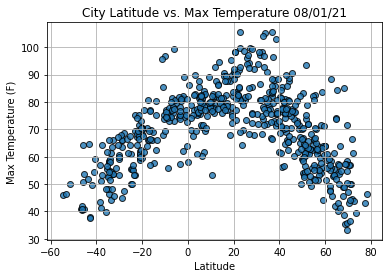

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

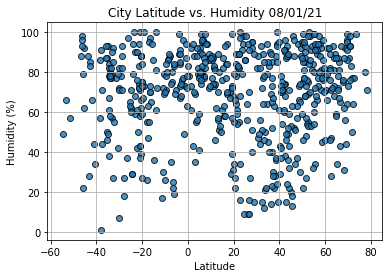

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

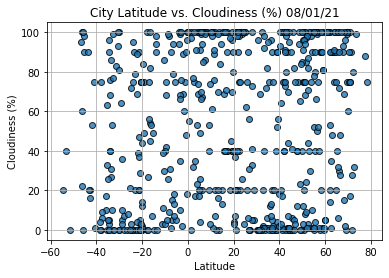

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

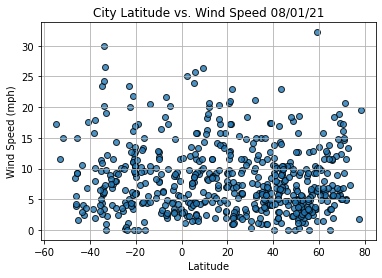

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()